In [1]:
import pandas as pd
import matplotlib as plt

#Import Data
tx_data=pd.read_csv("Final_invoice.csv")
tx_data.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,...,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,...,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,...,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [2]:
#Check the shape (number of columns and rows) in the dataset
tx_data.shape

(492314, 59)

In [3]:
#Find out missing values
tx_data.isnull().sum(axis=0)

Unnamed: 0                   0
Amt Rcvd From Custom    197286
Amt Rcvd From Ins Co    197286
Area / Locality          23890
CGST(14%)               197286
CGST(2.5%)              197286
CGST(6%)                197286
CGST(9%)                197286
CITY                         1
Cash /Cashless Type     464894
Claim No.               487510
Cust Type                    0
Customer No.                 0
District                     0
Expiry Date             470083
Gate Pass Date          451399
Gate Pass Time               0
IGST(12%)               197286
IGST(18%)               197286
IGST(28%)               197286
IGST(5%)                197286
Insurance Company       468723
Invoice Date                 0
Invoice No                   0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model   

In [4]:
columns_to_be_removed = tx_data.isnull().sum()[tx_data.isnull().sum().sort_values() > 197285].index

In [5]:
tx_data = tx_data[(tx_data['Total Amt Wtd Tax.']>0)]

In [6]:
tx_data = tx_data.drop(columns=columns_to_be_removed)

In [13]:
#Find out missing values
tx_data.isnull().sum(axis=0)

Customer No.          0
Invoice Date          0
Total Amt Wtd Tax.    0
dtype: int64

In [8]:
tx_data.dropna(inplace=True)

In [9]:
tx_data['Invoice Date'] = pd.to_datetime(tx_data['Invoice Date']).dt.date

#There are 135,080 missing values in the CustomerID column, and since our analysis is based on customers, 
#we will remove these missing values.
tx_data = tx_data[pd.notnull(tx_data['Customer No.'])]

necessary_cols = ['Customer No.', 'Invoice Date', 'Total Amt Wtd Tax.']
tx_data = tx_data[necessary_cols]
tx_data.head()

,Customer No.,Invoice Date,Total Amt Wtd Tax.
0,67849,2015-01-02,4051.95
1,84419,2015-01-03,1001.29
2,81055,2015-01-03,233.14
4,18980,2015-01-03,2747.12
5,84457,2015-01-03,865.92


In [10]:
#Print records pertaining unique Customer IDs
print(tx_data['Customer No.'].nunique())

234724


In [11]:
#Check the Last order date
last_order_date = tx_data['Invoice Date'].max()
print(last_order_date)
print("--------------------------------------")
print(tx_data[(tx_data['Customer No.']==67849)])

2016-10-31
--------------------------------------
Empty DataFrame
Columns: [Customer No., Invoice Date, Total Amt Wtd Tax.]
Index: []


In [62]:
from lifetimes.plotting import *
from lifetimes.utils import *
#Built-in utility functions from lifetimes package to transform the transactional data (one row per purchase) 
#into summary data (a frequency, recency, age and monetary).

lf_tx_data = summary_data_from_transaction_data(tx_data, 'Customer No.', 'Invoice Date', monetary_value_col='Total Amt Wtd Tax.', 
                                                observation_period_end='2016-12-10')
lf_tx_data.reset_index().head()

,Customer No.,frequency,recency,T,monetary_value
0,10000,3.0,661.0,1137.0,478.823333
1,100000,0.0,0.0,602.0,0.000000
2,100001,2.0,210.0,600.0,1602.655000
3,100004,0.0,0.0,602.0,0.000000
4,100005,0.0,0.0,602.0,0.000000


In [63]:
lf_tx_data.shape

(234724, 4)

count    234724.000000
mean          0.711342
std           1.662180
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         237.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers purchase the item only once: 66.79 %


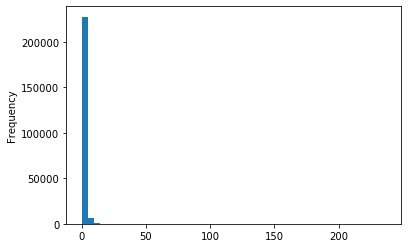

In [64]:
%matplotlib inline
#Create histogram to find out how many customers purchased item only once.
lf_tx_data['frequency'].plot(kind='hist', bins=50)
print(lf_tx_data['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(lf_tx_data['frequency'] == 0)/float(len(lf_tx_data))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

In [65]:
#Frequency/Recency Analysis Using the BG/NBD Model
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(lf_tx_data['frequency'], lf_tx_data['recency'], lf_tx_data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 234724 subjects, a: 3.47, alpha: 57.11, b: 6.08, r: 0.21>


In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.205439,0.001229,0.203030,0.207849
alpha,57.111000,0.600908,55.933220,58.288780
a,3.471677,0.119793,3.236883,3.706471
b,6.080210,0.241425,5.607018,6.553403


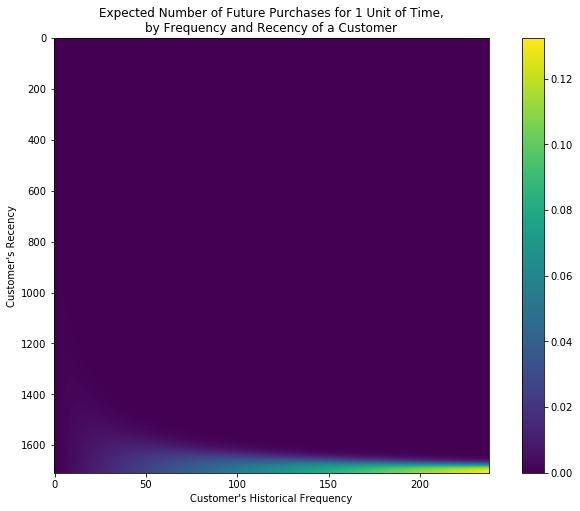

In [68]:

#Visualizing our frequency/recency matrix
%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

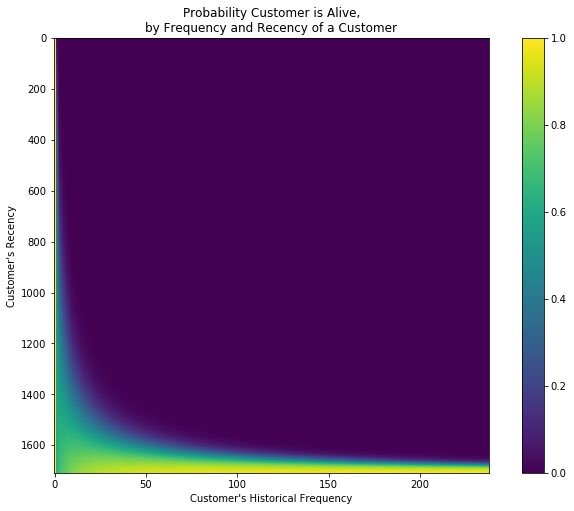

In [69]:
#predict if the customers are surely alive:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [70]:
#Predict future transaction in next 10 days i.e.top 10 customers that the model expects them to make purchases 
#in the next 30 days, based on historical data

t = 30
lf_tx_data['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, lf_tx_data['frequency'],
                                                lf_tx_data['recency'], lf_tx_data['T']),1)
lf_tx_data.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,Customer No.,frequency,recency,T,monetary_value,pred_num_txn
0,82793,32.0,679.0,719.0,2896.010625,0.8
1,92089,26.0,612.0,652.0,2488.040769,0.7
2,75256,43.0,732.0,781.0,1423.921628,0.7
3,104552,24.0,534.0,574.0,3368.228333,0.7
4,111693,39.0,487.0,532.0,390.403846,0.7
5,131780,19.0,373.0,413.0,3416.475263,0.6
6,115095,27.0,459.0,510.0,16371.437778,0.6
7,104031,19.0,536.0,578.0,1086.727895,0.6
8,87730,22.0,639.0,681.0,5581.065909,0.6
9,58803,46.0,884.0,942.0,1688.326522,0.6


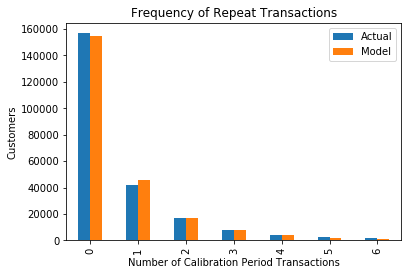

In [71]:
#Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [72]:
#Customer's future transaction prediction for next 10 days

t = 30
individual = lf_tx_data.loc['82793']
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

#OBSERVATION: Our model predicts that customer 14911’s future transaction is appx 3 in 10 days.

0.7797890621104139

In [27]:
tx_data['Invoice Date'].describe()

count         416020
unique          1616
top       2016-09-30
freq            1750
Name: Invoice Date, dtype: object

              frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer No.                                                         
10000                   2.0        301.0  517.0                1.0   
10001                  10.0        777.0  779.0                1.0   
10002                   0.0          0.0  779.0                0.0   
10003                   2.0        529.0  779.0                0.0   
10004                   0.0          0.0  779.0                0.0   

              duration_holdout  
Customer No.                    
10000                      580  
10001                      580  
10002                      580  
10003                      580  
10004                      580  


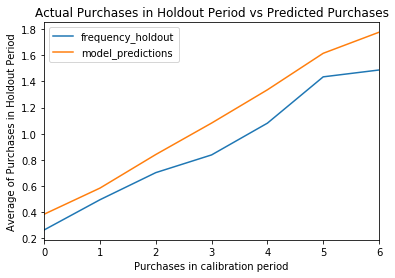

In [73]:
summary_cal_holdout = calibration_and_holdout_data(tx_data, 'Customer No.', 'Invoice Date',
                                        calibration_period_end='2015-03-31',
                                        observation_period_end='2016-10-31' )   
print(summary_cal_holdout.head())

from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)


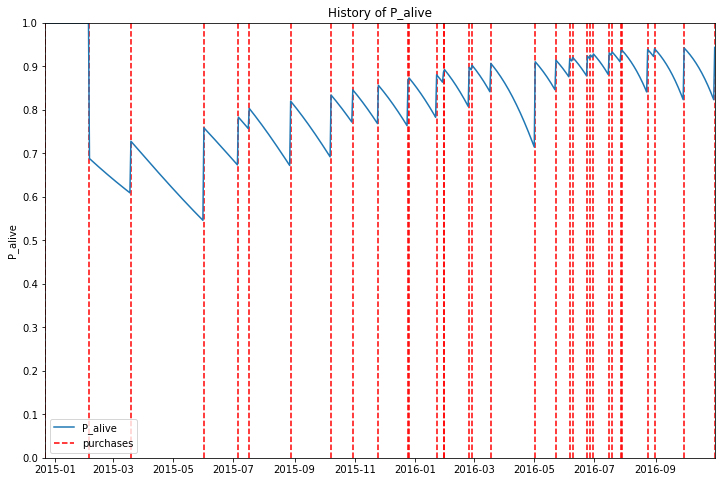

In [74]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
#id = 14620  # id = 18074  id = 14606
days_since_birth = 365
sp_trans = tx_data[tx_data['Customer No.'] == '82793']
plot_history_alive(bgf, days_since_birth, sp_trans, 'Invoice Date')



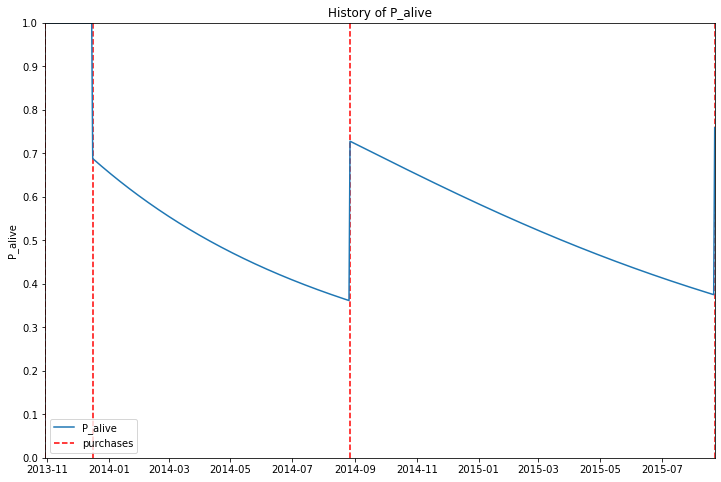

In [75]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
#id = 14620  # id = 18074  id = 14606
days_since_birth = 365
sp_trans = tx_data[tx_data['Customer No.'] == '10000']
plot_history_alive(bgf, days_since_birth, sp_trans, 'Invoice Date')

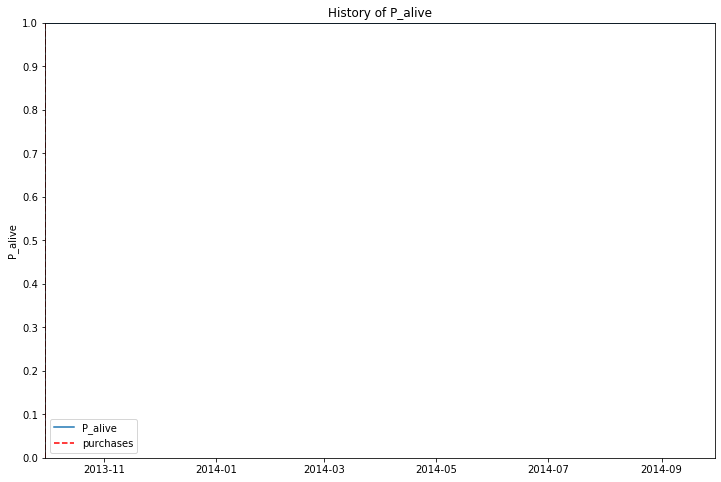

In [76]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
#id = 14620  # id = 18074  id = 14606
days_since_birth = 365
sp_trans = tx_data[tx_data['Customer No.'] == '27651']
plot_history_alive(bgf, days_since_birth, sp_trans, 'Invoice Date')


In [77]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation.
lf_tx_data[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.245541
frequency,0.245541,1.000000


In [78]:
#Shortlist customers who had at least one repeat purchase with the company. 
shortlisted_customers = lf_tx_data[lf_tx_data['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

  Customer No.  frequency  recency       T  monetary_value  pred_num_txn
0        10000        3.0    661.0  1137.0      478.823333           0.0
1       100001        2.0    210.0   600.0     1602.655000           0.0
2       100007        4.0    473.0   602.0    11497.180000           0.1
3       100008        1.0    126.0   600.0     1935.610000           0.0
4        10001       11.0    833.0  1399.0     5934.259091           0.0
-----------------------------------------
The Number of Returning Customers are:  77956


In [79]:
#Train gamma-gamma model by taking into account the monetary_value.
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers['frequency'],shortlisted_customers['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 77956 subjects, p: 0.65, q: 2.40, v: 10770.49>


In [80]:
#After applying Gamma-Gamma model, now we can estimate average transaction value for each customer. 
print(ggf.conditional_expected_average_profit(
        lf_tx_data['frequency'],
        lf_tx_data['monetary_value']
    ).head(10))

Customer No.
10000     2371.216884
100000    5014.257252
100001    3369.308336
100004    5014.257252
100005    5014.257252
100006    5014.257252
100007    9232.182235
100008    4036.279751
100009    5014.257252
10001     5783.959156
dtype: float64


In [81]:
lf_tx_data['pred_txn_value'] = round(ggf.conditional_expected_average_profit(
        lf_tx_data['frequency'],
        lf_tx_data['monetary_value']), 2)
lf_tx_data.reset_index().head()

,Customer No.,frequency,recency,T,monetary_value,pred_num_txn,pred_txn_value
0,10000,3.0,661.0,1137.0,478.823333,0.0,2371.22
1,100000,0.0,0.0,602.0,0.000000,0.0,5014.26
2,100001,2.0,210.0,600.0,1602.655000,0.0,3369.31
3,100004,0.0,0.0,602.0,0.000000,0.0,5014.26
4,100005,0.0,0.0,602.0,0.000000,0.0,5014.26


In [82]:
#Calculate Customer Lifetime Value
lf_tx_data['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    lf_tx_data['frequency'],
    lf_tx_data['recency'],
    lf_tx_data['T'],
    lf_tx_data['monetary_value'],
    time=12, # months
    discount_rate=0.01 
), 2)

lf_tx_data.drop(lf_tx_data.iloc[:, 0:6], inplace=True, axis=1)

lf_tx_data.sort_values(by='CLV', ascending=False).head(10).reset_index()

,Customer No.,CLV
0,172936,206739.36
1,241519,162528.02
2,104639,126469.71
3,110349,102651.16
4,84810,96597.91
5,192737,96101.85
6,213011,92346.81
7,83885,88631.69
8,151790,88414.41
9,115095,87613.82


# XGB

In [84]:
tx_data['Invoice Date'].max()


datetime.date(2016, 10, 31)

In [86]:
tx_data['Invoice Date'].min()

datetime.date(2012, 4, 7)

In [90]:
import datetime as dt

In [95]:
A = tx_data[tx_data['Invoice Date']>dt.date(2016, 9, 30)]

In [96]:
A

,Customer No.,Invoice Date,Total Amt Wtd Tax.
446434,246180,2016-10-01,248.64
446435,243390,2016-10-01,1132.12
446436,246132,2016-10-01,999.14
446437,246436,2016-10-01,1000.00
446438,246394,2016-10-01,999.14
...,...,...,...
473302,259643,2016-10-31,11385.56
473303,154317,2016-10-31,199.14
473304,171726,2016-10-31,8391.17
473305,141440,2016-10-31,3444.40


In [97]:
Z = pd.DataFrame(A['Customer No.'].value_counts()).reset_index()

In [98]:
Z

,index,Customer No.
0,221957,104
1,244086,56
2,248534,22
3,222039,16
4,242650,14
...,...,...
21976,232596,1
21977,256880,1
21978,255249,1
21979,239464,1


In [99]:
list(Z.columns)

['index', 'Customer No.']

In [101]:
Z.columns = ['Customer No.','buytime']
Z = Z.sort_values(['buytime'], ascending = False)
Z.head(20)


,Customer No.,buytime
0,221957,104
1,244086,56
2,248534,22
3,222039,16
4,242650,14
5,247915,9
6,254454,9
7,242581,9
8,197182,7
9,240382,7


In [102]:
print(len(Z))
print(len(set(tx_data['Customer No.'])))


21981
234724


In [103]:
allcus = pd.DataFrame(set(tx_data['Customer No.']), columns = ['Customer No.'])

In [104]:
allcus

,Customer No.
0,169931
1,112670
2,252263
3,131184
4,131257
...,...
234719,187459
234720,54360
234721,170977
234722,169663


In [105]:
allcus = pd.merge(allcus, Z, on=['Customer No.'], how='left').sort_values(['buytime'], ascending = False)

In [106]:
allcus

,Customer No.,buytime
37634,221957,104.0
66513,244086,56.0
99687,248534,22.0
108362,222039,16.0
40310,242650,14.0
...,...,...
234716,177639,NaN
234717,241159,NaN
234718,98927,NaN
234719,187459,NaN


In [107]:
allcus = allcus.fillna(0)

In [108]:
allcus

,Customer No.,buytime
37634,221957,104.0
66513,244086,56.0
99687,248534,22.0
108362,222039,16.0
40310,242650,14.0
...,...,...
234716,177639,0.0
234717,241159,0.0
234718,98927,0.0
234719,187459,0.0


In [109]:
allcus['buytime'].max()

104.0

In [110]:
allcus['buytime'] = allcus['buytime']/allcus['buytime'].max()

In [111]:
allcus

,Customer No.,buytime
37634,221957,1.000000
66513,244086,0.538462
99687,248534,0.211538
108362,222039,0.153846
40310,242650,0.134615
...,...,...
234716,177639,0.000000
234717,241159,0.000000
234718,98927,0.000000
234719,187459,0.000000


In [113]:
import numpy as np

In [114]:
allcus['v1'] = allcus['buytime']*0.78 + np.random.normal(0, 0.11, len(allcus))

allcus['v2'] = allcus['buytime']*allcus['buytime']*(-0.195) + 0.11*allcus['buytime']

allcus.corr()

,buytime,v1,v2
buytime,1.000000,0.030105,0.513585
v1,0.030105,1.000000,0.014926
v2,0.513585,0.014926,1.000000


In [115]:
allcus['v1'] = (allcus['v1'] - allcus['v1'].min())/(allcus['v1'].max() - allcus['v1'].min())

allcus['v2'] = (allcus['v2'] - allcus['v2'].min())/(allcus['v2'].max() - allcus['v2'].min())

allcus['score'] = round(allcus['v2']*100000)
allcus.score.max()

100000.0

In [117]:
allcus['discount'] = round(allcus['v1']*12.6)

allcus['r'] = np.random.randint(100,size=len(allcus))

def def2(D):
    if D['r']<13:
        x = 0
    else:
        x = D['discount']
    
    return x

allcus['discount'] = allcus.apply(def2, axis = 1)

v = ['Customer No.', 'score', 'discount']
allcus = allcus[v]

allcus = allcus.sort_values(['score'])

allcus.score.std()
allcus.corr()

allcus.to_csv('oth.csv', index = False)

In [160]:
allcus

,Customer No.,score,discount
37634,221957,0.0,13.0
148286,46407,85390.0,6.0
148287,46666,85390.0,5.0
148288,157119,85390.0,6.0
148289,96792,85390.0,4.0
...,...,...,...
205901,254454,93486.0,5.0
34267,242581,93486.0,4.0
40310,242650,96716.0,3.0
108362,222039,97754.0,6.0


In [118]:
dfnew_train = tx_data[tx_data['Invoice Date'] < dt.date(2016, 9, 30)]
dfnew_test = tx_data[tx_data['Invoice Date'] >= dt.date(2016, 9, 30)]


In [121]:
maxdate = dfnew_train['Invoice Date'].max()
mindate = dfnew_train['Invoice Date'].min()

In [122]:
maxdate

datetime.date(2016, 9, 29)

In [123]:
mindate

datetime.date(2012, 4, 7)

In [125]:
dfnew_train['duration'] =  (maxdate - dfnew_train['Invoice Date'])/np.timedelta64(1, 'D')

In [126]:
dfnew_train

,Customer No.,Invoice Date,Total Amt Wtd Tax.,duration
0,67849,2015-01-02,4051.95,636.0
1,84419,2015-01-03,1001.29,635.0
2,81055,2015-01-03,233.14,635.0
4,18980,2015-01-03,2747.12,635.0
5,84457,2015-01-03,865.92,635.0
...,...,...,...,...
492309,203820,2016-06-30,4458.15,91.0
492310,170411,2016-06-30,6832.08,91.0
492311,48811,2016-06-30,9187.71,91.0
492312,204067,2016-06-30,11100.00,91.0


In [127]:
# get time duration between the last transaction to now
dfsum1 = dfnew_train.groupby(['Customer No.'])['duration'].min().reset_index()
dfsum1.head()

,Customer No.,duration
0,10000,404.0
1,100000,530.0
2,100001,318.0
3,100004,530.0
4,100005,530.0


In [128]:
dfsum1.rename(columns = {'duration':'latetime'}, inplace = True)

In [129]:
dfsum1

,Customer No.,latetime
0,10000,404.0
1,100000,530.0
2,100001,318.0
3,100004,530.0
4,100005,530.0
...,...,...
219002,MFCCM22,350.0
219003,MFCWP01,103.0
219004,PLX076,14.0
219005,PLX099,0.0


In [131]:
# get time duration between the first transaction to now
dfsum2 = dfnew_train.groupby(['Customer No.'])['duration'].max().reset_index()
dfsum2.rename(columns = {'duration':'earlytime'}, inplace = True)

In [132]:
dfsum2

,Customer No.,earlytime
0,10000,1065.0
1,100000,530.0
2,100001,528.0
3,100004,530.0
4,100005,530.0
...,...,...
219002,MFCCM22,422.0
219003,MFCWP01,1606.0
219004,PLX076,27.0
219005,PLX099,0.0


In [134]:
# get transaction frequency (whole history)
dfnew_train['freq'] =1 
dfsum3 = dfnew_train.groupby(['Customer No.'])['freq'].sum().reset_index()

In [135]:
dfsum3

,Customer No.,freq
0,10000,4
1,100000,1
2,100001,3
3,100004,1
4,100005,1
...,...,...
219002,MFCCM22,6
219003,MFCWP01,326
219004,PLX076,2
219005,PLX099,1


In [136]:
# get transaction frequency (recent 3 months history)
dfnew_train['freq_3m'] =1 
dfsum4 = dfnew_train[dfnew_train.duration<91].groupby(['Customer No.'])['freq_3m'].sum().reset_index()


In [137]:
dfsum4

,Customer No.,freq_3m
0,100007,1
1,100018,3
2,100022,2
3,100035,1
4,100043,1
...,...,...
50657,MFCCM06,1
50658,MFCCM21,2
50659,PLX076,2
50660,PLX099,1


In [138]:
dfsum = pd.merge(dfsum1, dfsum2, on=['Customer No.'], how='outer')
dfsum = pd.merge(dfsum, dfsum3, on=['Customer No.'], how='outer')
dfsum = pd.merge(dfsum, dfsum4, on=['Customer No.'], how='outer')

In [139]:
dfsum

,Customer No.,latetime,earlytime,freq,freq_3m
0,10000,404.0,1065.0,4,NaN
1,100000,530.0,530.0,1,NaN
2,100001,318.0,528.0,3,NaN
3,100004,530.0,530.0,1,NaN
4,100005,530.0,530.0,1,NaN
...,...,...,...,...,...
219002,MFCCM22,350.0,422.0,6,NaN
219003,MFCWP01,103.0,1606.0,326,NaN
219004,PLX076,14.0,27.0,2,2.0
219005,PLX099,0.0,0.0,1,1.0


In [140]:
#get other data source
other_data = pd.read_csv('oth.csv')
list(other_data.columns)
dfsum = pd.merge(dfsum, other_data, on=['Customer No.'], how='left')


In [141]:
dfsum

,Customer No.,latetime,earlytime,freq,freq_3m,score,discount
0,10000,404.0,1065.0,4,NaN,85390.0,5.0
1,100000,530.0,530.0,1,NaN,85390.0,0.0
2,100001,318.0,528.0,3,NaN,85390.0,4.0
3,100004,530.0,530.0,1,NaN,85390.0,0.0
4,100005,530.0,530.0,1,NaN,85390.0,5.0
...,...,...,...,...,...,...,...
219002,MFCCM22,350.0,422.0,6,NaN,85390.0,3.0
219003,MFCWP01,103.0,1606.0,326,NaN,85390.0,4.0
219004,PLX076,14.0,27.0,2,2.0,85390.0,4.0
219005,PLX099,0.0,0.0,1,1.0,86434.0,5.0


In [142]:
# get target 
dfnew_test['target'] = 1
dfsum_target = dfnew_test.groupby(['Customer No.'])['target'].sum().reset_index()

In [143]:
dfsum_target

,Customer No.,target
0,100043,1
1,100065,1
2,100164,3
3,100168,1
4,100230,1
...,...,...
23354,PLX081,1
23355,PLX099,1
23356,PLX109,7
23357,PLX241,1


In [144]:
dfsum = pd.merge(dfsum, dfsum_target, on=['Customer No.'], how='left')

In [145]:
dfsum

,Customer No.,latetime,earlytime,freq,freq_3m,score,discount,target
0,10000,404.0,1065.0,4,NaN,85390.0,5.0,NaN
1,100000,530.0,530.0,1,NaN,85390.0,0.0,NaN
2,100001,318.0,528.0,3,NaN,85390.0,4.0,NaN
3,100004,530.0,530.0,1,NaN,85390.0,0.0,NaN
4,100005,530.0,530.0,1,NaN,85390.0,5.0,NaN
...,...,...,...,...,...,...,...,...
219002,MFCCM22,350.0,422.0,6,NaN,85390.0,3.0,NaN
219003,MFCWP01,103.0,1606.0,326,NaN,85390.0,4.0,NaN
219004,PLX076,14.0,27.0,2,2.0,85390.0,4.0,1.0
219005,PLX099,0.0,0.0,1,1.0,86434.0,5.0,1.0


In [146]:
dfsum  = dfsum.fillna(0).sort_values(['target'], ascending = False)


In [147]:
dfsum

,Customer No.,latetime,earlytime,freq,freq_3m,score,discount,target
121872,221957,0.0,49.0,223,223.0,0.0,13.0,108.0
121961,222039,0.0,47.0,9,9.0,97754.0,6.0,20.0
140886,242581,5.0,5.0,1,1.0,93486.0,4.0,9.0
97184,197182,20.0,108.0,6,5.0,91940.0,5.0,7.0
11741,111693,2.0,460.0,37,12.0,91940.0,5.0,7.0
...,...,...,...,...,...,...,...,...
73884,173692,36.0,174.0,2,1.0,85390.0,5.0,0.0
73885,173693,48.0,174.0,2,1.0,85390.0,5.0,0.0
73886,173694,168.0,168.0,1,0.0,85390.0,4.0,0.0
73887,173695,175.0,175.0,1,0.0,85390.0,0.0,0.0


In [148]:
import xgboost
from sklearn.model_selection import train_test_split

xgb_model = xgboost.XGBRegressor(n_estimators=2200, objective='reg:linear', max_depth = 5)
 
predictors = ['latetime','earlytime', 'freq','freq_3m', 'score','discount']
X = dfsum[predictors]
y = dfsum.target

x_trains, x_valids, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=12)

xgb_model.fit(x_trains, y_train)

preds = xgb_model.predict(x_valids)
errs= np.abs(preds - y_valid)**2
mse = np.sqrt(errs.mean())

[12:06:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [149]:
errs

142646    6.138360e-04
154859    1.869593e-08
161934    4.448570e-09
176359    1.194975e-08
151185    4.259793e-11
              ...     
151736    1.798561e-10
122159    8.144576e-08
58428     1.827430e-07
143338    2.551701e-10
100869    5.861345e-06
Name: target, Length: 65703, dtype: float64

In [150]:
mse

0.0803038622046584

In [152]:
from xgboost import plot_importance
from matplotlib import pyplot


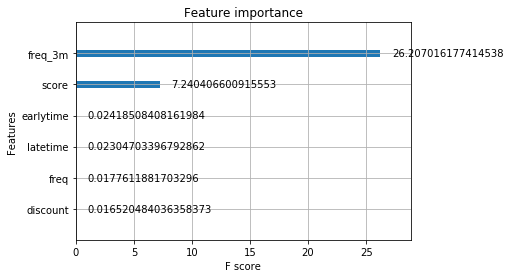

In [153]:
# for XGBRegressor, we use the following ways
xgb_model.get_booster().get_score(importance_type="gain")
xgb_model.get_booster().get_score(importance_type="weight")

'''
importance_type:
    
‘weight’ - the number of times a feature is used to split the data across all trees.
‘gain’ - the average gain across all splits the feature is used in.
‘cover’ - the average coverage across all splits the feature is used in. (yes/no proportion)
‘total_gain’ - the total gain across all splits the feature is used in.
‘total_cover’ - the total coverage across all splits the feature is used in.

'''

# plot feature importance
plot_importance(xgb_model, importance_type='gain')
pyplot.show()

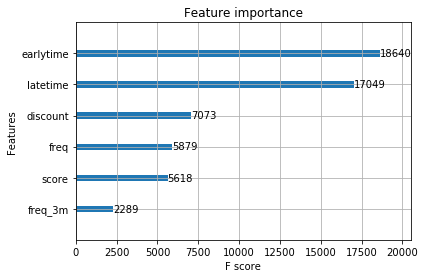

In [154]:
plot_importance(xgb_model, importance_type='weight') # default option is 'weight'
pyplot.show()


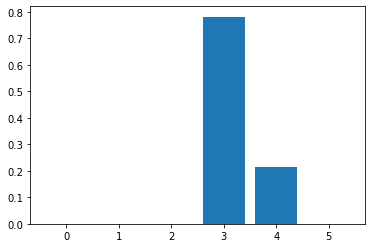

In [155]:
# we can also use feature_importances_, but it is the same as importance_type='gain'
imp = xgb_model.feature_importances_
pyplot.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
pyplot.show()


In [156]:
#  we can list importance by dict, by 'gain'
sorted_idx = np.argsort(xgb_model.feature_importances_)[::-1]
for index in sorted_idx:
    print([x_trains.columns[index], xgb_model.feature_importances_[index]]) 


['freq_3m', 0.7816238]
['score', 0.215945]
['earlytime', 0.0007213197]
['latetime', 0.00068737735]
['freq', 0.0005297271]
['discount', 0.00049272313]


In [157]:
important_var = [(x_trains.columns[index], xgb_model.feature_importances_[index]) for index in sorted_idx]


In [158]:
important_var

[('freq_3m', 0.7816238),
 ('score', 0.215945),
 ('earlytime', 0.0007213197),
 ('latetime', 0.00068737735),
 ('freq', 0.0005297271),
 ('discount', 0.00049272313)]

In [159]:
# check correlation of features with target
dfsum.corr()


,latetime,earlytime,freq,freq_3m,score,discount,target
latetime,1.000000,0.888276,-0.072545,-0.374022,-0.107344,-0.005508,-0.102342
earlytime,0.888276,1.000000,0.191500,-0.339246,-0.092498,-0.004045,-0.088504
freq,-0.072545,0.191500,1.000000,0.244251,-0.092651,0.006250,0.208229
freq_3m,-0.374022,-0.339246,0.244251,1.000000,-0.270772,0.010633,0.561920
score,-0.107344,-0.092498,-0.092651,-0.270772,1.000000,-0.001164,0.084835
discount,-0.005508,-0.004045,0.006250,0.010633,-0.001164,1.000000,0.011824
target,-0.102342,-0.088504,0.208229,0.561920,0.084835,0.011824,1.000000
